In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [129]:
metal_filename = "metal_forming_lab.csv"
raw_data = pd.read_csv(metal_filename, delimiter=",")

for col in raw_data.columns[2:]:
    raw_data[col] = raw_data[col].astype(float)
raw_data.columns

Index(['Measurement', 'Material', 'Initial', 'Cold Rolling - Pass 1',
       'Cold Rolling - Pass 2', 'Cold Rolling - Pass 3',
       'Hot Rolling (700F,  3 Passes)'],
      dtype='object')

In [130]:
materials = raw_data["Material"].unique()
measurements = raw_data["Measurement"].unique()
measurements

array(['Thickness (mm)', 'Width (mm)', 'Length (mm)',
       'Vickers Hardness (HV)', 'Volume (mm^3)'], dtype=object)

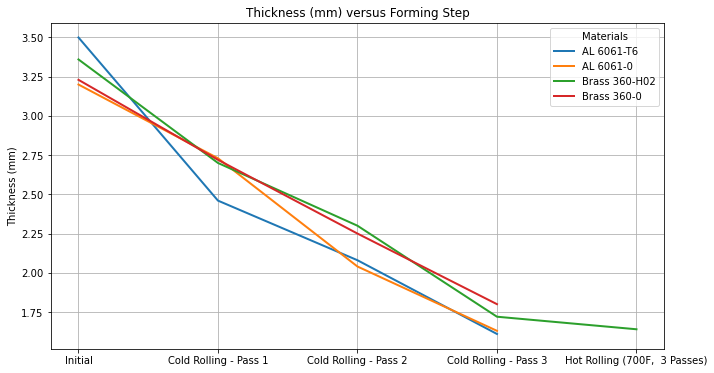

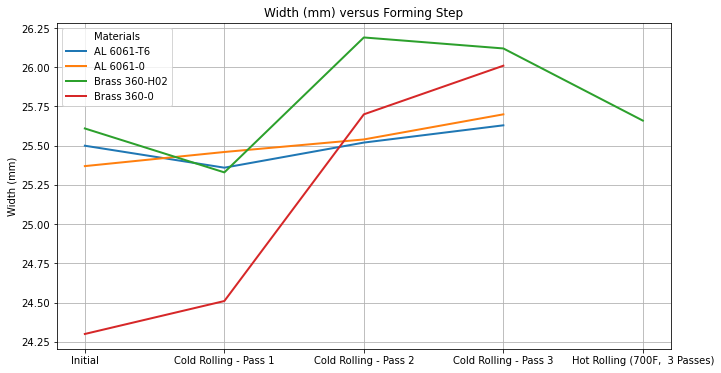

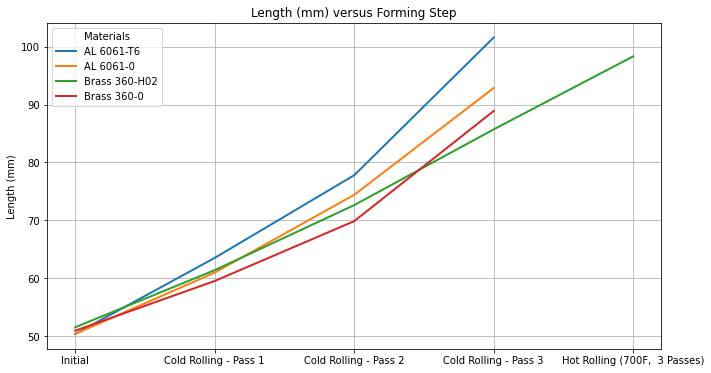

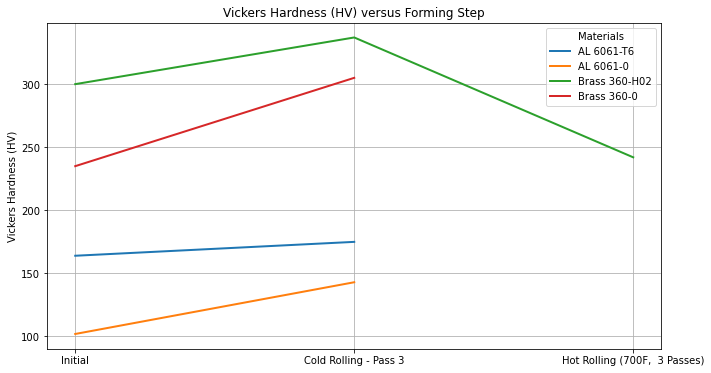

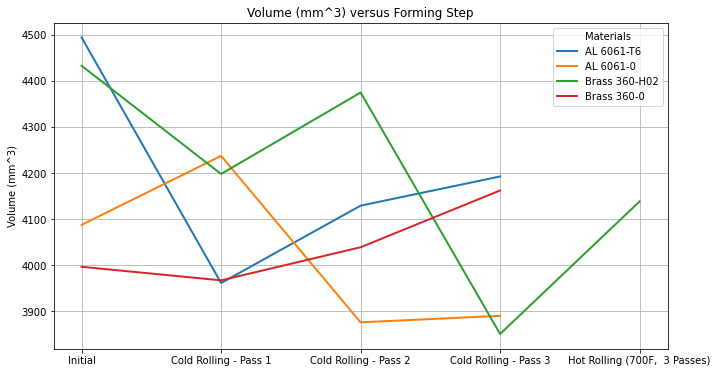

In [132]:
for measure in measurements:
    subset = raw_data[raw_data["Measurement"]==measure]
    fig = plt.figure(figsize=(11,6))
    ax = fig.add_subplot(111)
    for mat in materials:
        y = subset[subset["Material"]==mat]
        if measure=="Vickers Hardness (HV)":
            cols = ['Initial', 'Cold Rolling - Pass 3',
                    'Hot Rolling (700F,  3 Passes)']
            x = range(1,1+len(cols))
        else:
            cols = ['Initial', 'Cold Rolling - Pass 1',
                   'Cold Rolling - Pass 2', 'Cold Rolling - Pass 3',
                   'Hot Rolling (700F,  3 Passes)']
        x = range(1,1+len(cols))
        ax.plot(x, y[cols].to_numpy()[0], linewidth=2, label=mat)
    ax.set_title(measure + " versus Forming Process")
    ax.set_ylabel(measure)
    ax.set_xticks(x)
    ax.set_xticklabels(cols, rotation=0)
    ax.grid()
    ax.legend(title='Materials')